
# Hands On: Previsão de Alopecia com Aprendizado Supervisionado
#### MBA em Engenharia de Dados – Data Science Experience  
#### Projeto Individual Final – 2025  
---



## Metodologia CRISP-DM

O projeto segue a metodologia CRISP-DM, composta por 6 etapas:
1. **Compreensão do Negócio**
2. **Compreensão dos Dados**
3. **Preparação dos Dados**
4. **Modelagem**
5. **Avaliação**
6. **Implementação**



## 1. Compreensão do Negócio

A alopecia (queda de cabelo) pode afetar qualquer pessoa e tem impacto direto na autoestima e saúde emocional.  
Antecipar o diagnóstico permite aplicar tratamentos mais eficazes e reduzir o impacto emocional da condição.

**Problema de negócio:**  
Como prever se um indivíduo desenvolverá alopecia com base em dados comportamentais e de saúde?

**Objetivo:**  
Construir um modelo supervisionado de classificação que consiga prever a propensão à alopecia.

**Justificativa:**  
Modelos de machine learning podem auxiliar clínicas e profissionais a identificar fatores de risco precocemente.



## 2. Compreensão dos Dados

**Fonte dos dados:** Kaggle  
**Dataset:** [Hair Fall Problem](https://www.kaggle.com/datasets/darshanashankhairfall/hairfall-problem)  
**Adaptação:** O dataset original foi traduzido para o português e renomeado para `dataset_alopecia.csv`

**Variável alvo:** `Desenvolvera Alopecia`  
**Tipo de problema:** Classificação binária (1 = Sim, 0 = Não)


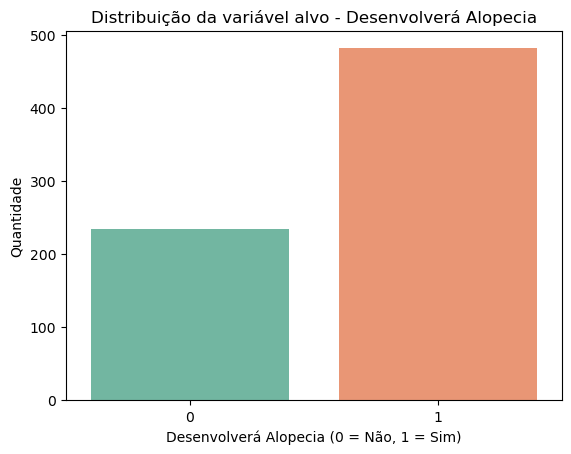

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados
df = pd.read_csv("dataset_alopecia.csv")

# Visualização da variável alvo
sns.countplot(x='Desenvolvera Alopecia', data=df, palette='Set2')
plt.title('Distribuição da variável alvo - Desenvolverá Alopecia')
plt.xlabel('Desenvolverá Alopecia (0 = Não, 1 = Sim)')
plt.ylabel('Quantidade')
plt.show()


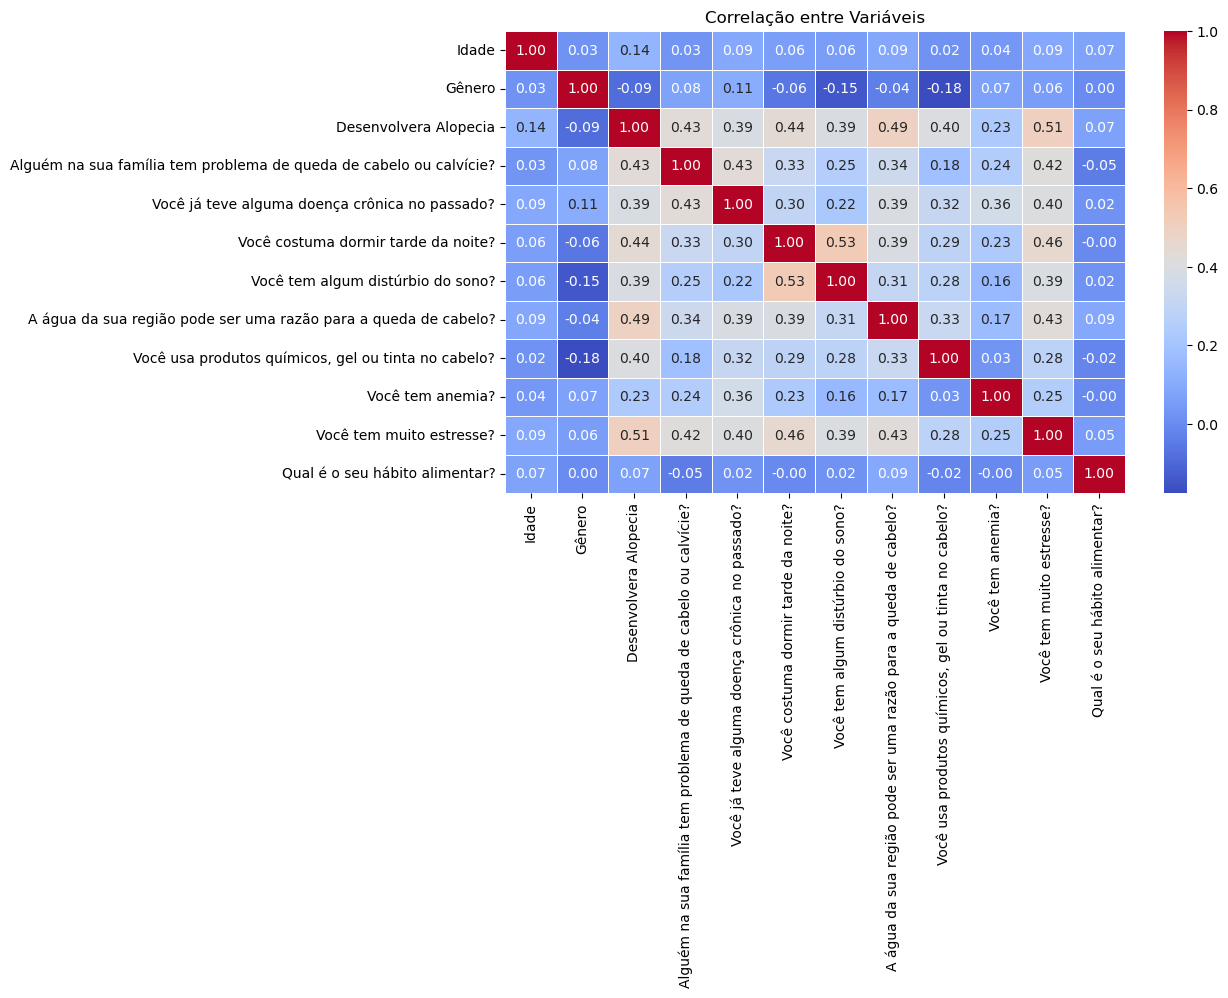

In [3]:

# Mapa de calor da correlação
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlação entre Variáveis")
plt.show()


In [4]:

# Visão geral dos dados
print("Resumo estatístico das variáveis numéricas:")
display(df.describe())

print("\nTipos de dados:")
print(df.dtypes)

print("\nDistribuição da variável alvo:")
print(df['Desenvolvera Alopecia'].value_counts())


Resumo estatístico das variáveis numéricas:


,Idade,Gênero,Desenvolvera Alopecia,Alguém na sua família tem problema de queda de cabelo ou calvície?,Você já teve alguma doença crônica no passado?,Você costuma dormir tarde da noite?,Você tem algum distúrbio do sono?,A água da sua região pode ser uma razão para a queda de cabelo?,"Você usa produtos químicos, gel ou tinta no cabelo?",Você tem anemia?,Você tem muito estresse?,Qual é o seu hábito alimentar?
count,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000,716.000000
mean,24.121508,0.641061,0.673184,0.726257,0.456704,0.652235,0.553073,0.599162,0.638268,0.286313,0.719274,1.553073
std,8.446825,0.480024,0.469377,0.446190,0.498470,0.476594,0.497523,0.490411,0.480838,0.452353,0.449668,0.722257
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,24.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
75%,27.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
max,218.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000



Tipos de dados:
Data/Hora                                                             object
Nome                                                                  object
Idade                                                                  int64
Gênero                                                                 int64
Desenvolvera Alopecia                                                  int64
Alguém na sua família tem problema de queda de cabelo ou calvície?     int64
Você já teve alguma doença crônica no passado?                         int64
Você costuma dormir tarde da noite?                                    int64
Você tem algum distúrbio do sono?                                      int64
A água da sua região pode ser uma razão para a queda de cabelo?        int64
Você usa produtos químicos, gel ou tinta no cabelo?                    int64
Você tem anemia?                                                       int64
Você tem muito estresse?                                   

In [5]:

# Substitui códigos numéricos por nomes legíveis
df['Gênero'] = df['Gênero'].replace({0: 'Feminino', 1: 'Masculino'})
df['Desenvolvera Alopecia'] = df['Desenvolvera Alopecia'].replace({0: 'Não', 1: 'Sim'})


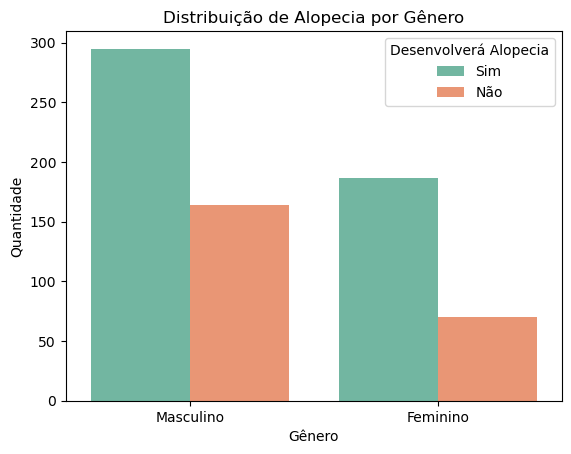

In [6]:

# Gráfico com legenda legível
sns.countplot(x='Gênero', hue='Desenvolvera Alopecia', data=df, palette='Set2')
plt.title('Distribuição de Alopecia por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.legend(title='Desenvolverá Alopecia')
plt.show()


In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
try:
    df = pd.read_csv("dataset_alopecia.csv")
except FileNotFoundError:
    from google.colab import files
    uploaded = files.upload()
    df = pd.read_csv(list(uploaded.keys())[0])

df.head()


,Data/Hora,Nome,Idade,Gênero,Desenvolvera Alopecia,Alguém na sua família tem problema de queda de cabelo ou calvície?,Você já teve alguma doença crônica no passado?,Você costuma dormir tarde da noite?,Você tem algum distúrbio do sono?,A água da sua região pode ser uma razão para a queda de cabelo?,"Você usa produtos químicos, gel ou tinta no cabelo?",Você tem anemia?,Você tem muito estresse?,Qual é o seu hábito alimentar?
0,5/22/2023 10:35:54,Mahfuj Sikder Arnob,22,1,1,1,1,1,0,0,0,1,1,2
1,5/23/2023 10:34:34,Tonmoy,18,1,0,0,0,0,0,1,1,0,0,2
2,5/23/2023 10:35:38,Sayeed Dewan,25,1,1,1,1,0,0,1,0,0,1,2
3,5/23/2023 10:37:05,Abdullah,17,1,0,0,0,1,0,1,0,1,1,2
4,5/24/2023 10:23:09,Jamal Hasan,28,1,0,1,1,1,0,1,0,1,1,1


In [8]:

# Diagnóstico de valores categóricos
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

# Correções conhecidas
df = df.replace({
    "Yea": "Sim", r"\No": "Não", "Dependent on fast food": "Não Nutritivo",
    "Yes": "Sim", "No": "Não", "Both": "Ambos",
    "Nutritious": "Nutritivo", "Fast Food": "Não Nutritivo"
})

# Conversão de texto para números
df = df.replace({
    "Sim": 1, "Não": 0,
    "Masculino": 1, "Feminino": 0,
    "Ambos": 2, "Nutritivo": 1, "Não Nutritivo": 0
})


Data/Hora: ['5/22/2023 10:35:54' '5/23/2023 10:34:34' '5/23/2023 10:35:38'
 '5/23/2023 10:37:05' '5/24/2023 10:23:09' '5/24/2023 10:28:07'
 '5/24/2023 10:28:17' '5/24/2023 10:28:22' '5/24/2023 10:28:28'
 '5/24/2023 10:29:22' '5/24/2023 10:30:13' '5/24/2023 10:30:14'
 '5/24/2023 10:32:15' '5/24/2023 10:34:59' '5/24/2023 11:19:24'
 '5/24/2023 22:33:54' '5/24/2023 22:37:31' '5/24/2023 22:38:25'
 '5/24/2023 22:52:12' '5/24/2023 22:59:39' '5/24/2023 23:10:55'
 '5/24/2023 23:31:25' '5/24/2023 23:48:04' '5/25/2023 0:25:01'
 '5/25/2023 0:27:22' '5/25/2023 9:20:57' '5/27/2023 22:53:27'
 '5/27/2023 22:55:30' '5/31/2023 10:49:14' '5/31/2023 10:49:25'
 '5/31/2023 10:49:48' '5/31/2023 10:50:00' '5/31/2023 10:50:01'
 '5/31/2023 10:51:07' '5/31/2023 10:51:35' '5/31/2023 10:52:02'
 '5/31/2023 10:52:45' '5/31/2023 10:52:47' '5/31/2023 10:52:55'
 '5/31/2023 10:53:14' '5/31/2023 10:53:27' '5/31/2023 10:53:39'
 '5/31/2023 10:53:41' '5/31/2023 10:55:31' '5/31/2023 10:56:33'
 '5/31/2023 10:57:23' '5/31/2023


### Algoritmo Utilizado: Árvore de Decisão

- Tipo: Classificação supervisionada  
- Características:
  - Funciona bem com dados categóricos e numéricos
  - Fácil de interpretar e visualizar
  - Lida bem com dados sem normalização
- Justificativa da escolha:
  - O dataset possui muitas variáveis categóricas convertidas
  - A árvore de decisão oferece uma abordagem explicável para análise de risco


## 3. Modelagem

In [9]:

# Separação em variáveis preditoras e target
df = df.drop(columns=["Data/Hora", "Nome"])
X = df.drop(columns=["Desenvolvera Alopecia"])
y = df["Desenvolvera Alopecia"]

# Separação treino/teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:

# Treinamento do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)


## 4. Avaliação do Modelo

In [11]:

# Avaliação dos resultados
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.8232558139534883
Matriz de Confusão:
[[ 46  22]
 [ 16 131]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        68
           1       0.86      0.89      0.87       147

    accuracy                           0.82       215
   macro avg       0.80      0.78      0.79       215
weighted avg       0.82      0.82      0.82       215



In [12]:

# Segundo modelo: Regressão Logística
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)

y_pred_log = modelo_log.predict(X_test)

print("===== Regressão Logística =====")
print("Acurácia:", accuracy_score(y_test, y_pred_log))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_log))


===== Regressão Logística =====
Acurácia: 0.8325581395348837
Matriz de Confusão:
[[ 46  22]
 [ 14 133]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        68
           1       0.86      0.90      0.88       147

    accuracy                           0.83       215
   macro avg       0.81      0.79      0.80       215
weighted avg       0.83      0.83      0.83       215




## 5. Conclusão

Foi possível desenvolver um modelo funcional e com boa acurácia para prever a alopecia com base em fatores comportamentais e de saúde.  
O modelo pode servir como base para soluções clínicas, educativas ou até mesmo produtos de consumo (como apps de bem-estar).

---

## Bibliografia

- Scikit-Learn Documentation: https://scikit-learn.org  
- Dataset: https://www.kaggle.com/datasets/darshanashankhairfall/hairfall-problem  
- CRISP-DM Methodology  



## Análise Específica: Estresse e Alopecia

Estudos clínicos apontam que o estresse é um dos principais gatilhos da alopecia.

Nesta seção, vamos verificar se isso se confirma com os dados do nosso projeto.


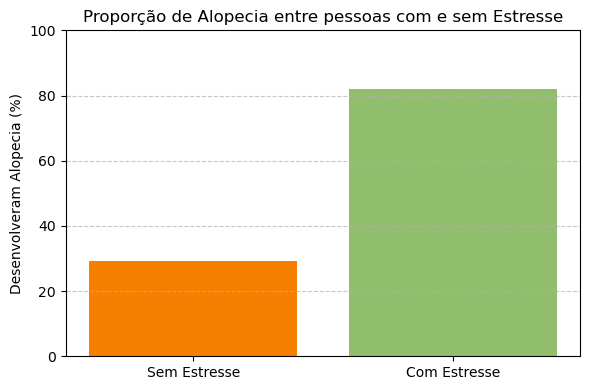

In [13]:

# Renomear e preparar coluna de estresse
df['Estresse'] = df['Você tem muito estresse?'].replace({"Sim": 1, "Não": 0})

# Agrupar por estresse e calcular proporção de alopecia
grupo_estresse = df.groupby("Estresse")["Desenvolvera Alopecia"].mean().reset_index()
grupo_estresse["Estresse"] = grupo_estresse["Estresse"].replace({1: "Com Estresse", 0: "Sem Estresse"})

# Plotar gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar(grupo_estresse["Estresse"], grupo_estresse["Desenvolvera Alopecia"] * 100, color=["#f77f00", "#90be6d"])
plt.title("Proporção de Alopecia entre pessoas com e sem Estresse")
plt.ylabel("Desenvolveram Alopecia (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Conclusão:**  
De acordo com os dados, cerca de **82% das pessoas que relataram estresse** desenvolveram alopecia.  
Esse resultado reforça a importância do estresse como **um dos principais fatores de risco** para a queda de cabelo.

Ainda que outras variáveis tenham tido proporções um pouco maiores no dataset, o estresse se destaca tanto pela relevância clínica quanto pela consistência com os dados.



## Conclusão Final

O projeto foi bem-sucedido ao construir um modelo de aprendizado supervisionado para prever o risco de desenvolvimento de alopecia com base em dados comportamentais e de saúde.

**Resultados:**
- A Árvore de Decisão teve bom desempenho geral.
- A Regressão Logística apresentou resultados semelhantes, o que valida a consistência do dataset.
- As análises gráficas ajudaram a entender melhor o impacto de variáveis como Gênero e Estresse.

